In [2]:
import os
import glob
import time
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import pandas as pd

import MetaTrader5 as mt5
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

import config

In [3]:
account = 51913983
password = "drbj2iln"
server = "Alpari-MT5-Demo"

In [4]:
mt5.initialize()
authorized=mt5.login(account, password=password, server=server)

In [21]:
account_info_dict = mt5.account_info()._asdict()
account_info_df = pd.DataFrame(account_info_dict, index=[0])

In [22]:
print("Profit:", account_info_df["profit"].iloc[0])
print("Equity:", account_info_df["equity"].iloc[0])
print("Margin:", account_info_df["margin"].iloc[0])
print("Margin Free:", account_info_df["margin_free"].iloc[0])

Profit: 0.0
Equity: 9880.58
Margin: 0.0
Margin Free: 9880.58


In [5]:
from_date=datetime(2020,1,1)
to_date=datetime.now()
history_data=(mt5.history_orders_get(from_date, to_date))

In [6]:
trade_data_dataframe=pd.DataFrame(list(history_data),columns=history_data[0]._asdict().keys())

In [20]:
trade_data_dataframe.head()

,ticket,time_setup,time_setup_msc,time_done,time_done_msc,time_expiration,type,type_time,type_filling,state,...,volume_initial,volume_current,price_open,sl,tp,price_current,price_stoplimit,symbol,comment,external_id
0,189649925,1701343191,1701343191743,1701343191,1701343191789,0,1,0,0,4,...,1.0,0.0,0.0,0.0,0.0,147.076,0.0,USDJPY,,
1,189649931,1701343193,1701343193481,1701343193,1701343193536,0,0,0,0,4,...,1.0,0.0,0.0,0.0,0.0,147.082,0.0,USDJPY,,
2,189649933,1701343194,1701343194186,1701343194,1701343194260,0,1,0,0,4,...,1.0,0.0,0.0,0.0,0.0,147.075,0.0,USDJPY,,
3,189649934,1701343194,1701343194863,1701343194,1701343194914,0,1,0,0,4,...,1.0,0.0,0.0,0.0,0.0,147.075,0.0,USDJPY,,
4,189649985,1701343212,1701343212008,1701343212,1701343212067,0,0,0,0,4,...,1.0,0.0,0.0,0.0,0.0,147.088,0.0,USDJPY,,


In [9]:
from_date=datetime(2020,1,1)
to_date=datetime.now()
history_deals=(mt5.history_deals_get(from_date, to_date))

In [10]:
deals_dataframe=pd.DataFrame(list(history_deals),columns=history_deals[0]._asdict().keys())

In [19]:
deals_dataframe.head()

,ticket,order,time,time_msc,type,entry,magic,position_id,reason,volume,price,commission,swap,profit,fee,symbol,comment,external_id,cumulative_profit
0,156509592,0,2023-11-30 11:18:27,2023-11-30 11:18:27.010,2,0,0,0,0,0.0,0.000,0.0,0.0,10000.0,0.0,,,,10000.0
1,156509735,189649925,2023-11-30 11:19:51,2023-11-30 11:19:51.789,1,0,0,189649925,0,1.0,147.076,-1.6,0.0,0.0,0.0,USDJPY,,,10000.0
2,156509740,189649931,2023-11-30 11:19:53,2023-11-30 11:19:53.536,0,0,0,189649931,0,1.0,147.082,-1.6,0.0,0.0,0.0,USDJPY,,,10000.0
3,156509742,189649933,2023-11-30 11:19:54,2023-11-30 11:19:54.260,1,0,0,189649933,0,1.0,147.075,-1.6,0.0,0.0,0.0,USDJPY,,,10000.0
4,156509743,189649934,2023-11-30 11:19:54,2023-11-30 11:19:54.914,1,0,0,189649934,0,1.0,147.075,-1.6,0.0,0.0,0.0,USDJPY,,,10000.0


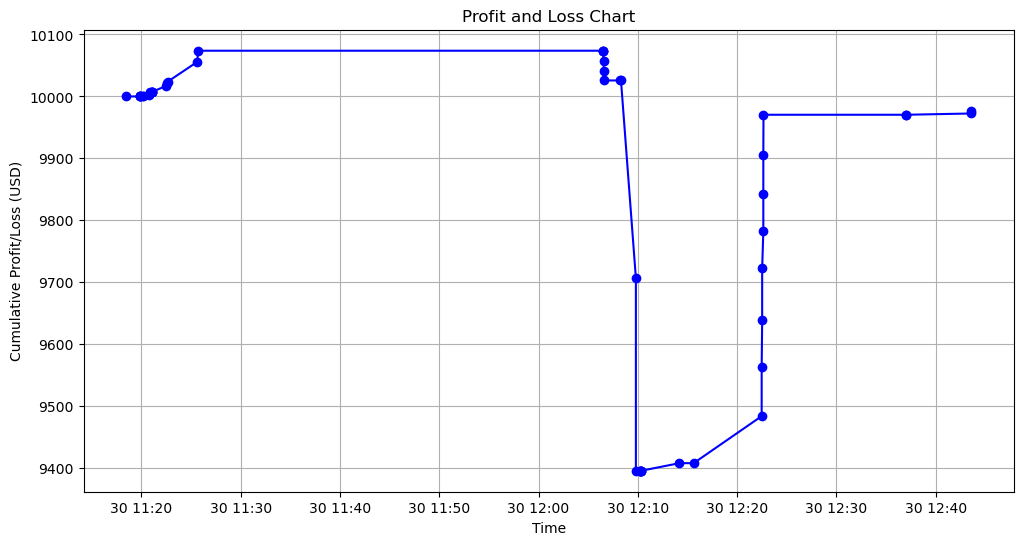

In [17]:
deals_dataframe['time'] = pd.to_datetime(deals_dataframe['time'], unit='s')
deals_dataframe['time_msc'] = pd.to_datetime(deals_dataframe['time_msc'], unit='ms')

# Calculate cumulative profit/loss
deals_dataframe['cumulative_profit'] = deals_dataframe['profit'].cumsum()

# Filter only rows with symbols (assuming these are trades)
trades_df = deals_dataframe[deals_dataframe['symbol'].notnull()]

# Plotting the P&L chart
plt.figure(figsize=(12, 6))
plt.plot(trades_df['time'], trades_df['cumulative_profit'], marker='o', linestyle='-', color='b')
plt.title('Profit and Loss Chart')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit/Loss (USD)')
plt.grid(True)
plt.show()